# Model Set-up Notebook  
<img style="float:right;" src="DewberryLogo_RGB.png" width=150px>

### ADCIRC-SWAN Model Setup 

*NOTE*: This Notebook was developed to work directly on Stampede2

### Requirements
 - Path to fort.15 template
 - Path to fort.13 and fort.14
 - Dewberry's custom python library for adcirc applications
 - Path for the model

### Steps
 1. Initialize Libraries and Paths
 2. Assign Tasks
 4. Print files to model directory

### 1. Initialize Libraries and Paths

In [1]:
from ipywidgets import *
import matplotlib.pyplot as plt # Import the Matplotlib package
from adcirc import adcirc
import os
import pandas as pd
import netCDF4 as nc4
from datetime import datetime
root_15  = r'C:\Users\tmiesse\Work\fort15_templates'
root_dir = r'C:\Users\tmiesse\Work\test'
template = 'fort_15_template_v2.15'
csv      = 'fort15_variables.csv'
f13      = 'fort.13'
f14      = 'fort.14'

### 2. Tasks

#### a. Modify fort.15

In [17]:
table15 = pd.read_csv(os.path.join(root_15,csv),sep=',')
table15

,variable,defin,content
0,%RunDescription%,Test1,run_description
1,%RunID%,v1,run_identification
2,%IHOT%,0,hot_start
3,%RNDAY%,7,length_of_time_in_days_of_the_simulation
4,%DRAMP%,2,used_to_compute_the_ramp_function_that_ramps_u...
5,%NHSTAR%,0,hot_start_output_files_generated
6,%NHSINC%,0,number_of_time_steps_at_which_hot_start_output...
7,%NCPROJ%,Fort15 test,Project_Title_(what_is_in_the_file)
8,%NCINST%,Dewberry,Project_Institution_(where_file_was_produced)
9,%NCSOUR%,OWI and NC,Project_Source_(how_it_was_produced)


In [18]:
# Change variable here
table15['defin'][0] = 'fort set-up'
table15['defin'][1] = 'v1'
table15['defin'][2] = '0'
table15['defin'][3] = '7'
table15['defin'][4] = '2'
table15['defin'][5] = '0'
table15['defin'][6] = '0'
table15['defin'][7] = 'fort set-up'
table15['defin'][8] = 'Dewberry'
table15['defin'][9] = 'OWI and NC'
table15['defin'][10] = 'Flooding in NC'
table15['defin'][11] = 'Storm Surge Update Proposal'
table15['defin'][12] = 'update on 2010 NC Proj.'
table15['defin'][13] = 'Tyler Miesse'
table15['defin'][14] = 'none'
table15['defin'][15] = 'tmiesse@Dewberry.com'
table15['defin'][16] = '2018-01-31 00:00:00'
table15

,variable,defin,content
0,%RunDescription%,fort set-up,run_description
1,%RunID%,v1,run_identification
2,%IHOT%,0,hot_start
3,%RNDAY%,7,length_of_time_in_days_of_the_simulation
4,%DRAMP%,2,used_to_compute_the_ramp_function_that_ramps_u...
5,%NHSTAR%,0,hot_start_output_files_generated
6,%NHSINC%,0,number_of_time_steps_at_which_hot_start_output...
7,%NCPROJ%,fort set-up,Project_Title_(what_is_in_the_file)
8,%NCINST%,Dewberry,Project_Institution_(where_file_was_produced)
9,%NCSOUR%,OWI and NC,Project_Source_(how_it_was_produced)


#### b. Check fort.13

In [4]:
fort13 = adcirc(root_dir,f13)
attr = fort13.attributes()
attr

,Parameter
0,wave_refraction_in_swan
1,sea_surface_height_above_geoid
2,surface_directional_effective_roughness_length
3,surface_canopy_coefficient
4,mannings_n_at_sea_floor
5,primitive_weighting_in_continuity_equation
6,average_horizontal_eddy_viscosity_in_sea_water...


In [5]:
table13 = fort13.read_fort13(attr)
table13.head()

,wave_refraction,sea_surface,surface_directional,surface_canopy,mannings_n,primitive_weighting,average_horizontal
0,1 0.000000,NaN,15490 0.0106490 0.00182500 0.00100000 0.001000...,16299 0.000000,24262 0.0500000,1 0.0200000,1 4.00000
1,2 0.000000,NaN,15491 0.00421200 0.00109300 0.00100000 0.00100...,21471 0.000000,25236 0.0500000,2 0.00500000,2 4.00000
2,3 0.000000,NaN,16297 0.0511780 0.0586370 0.131352 0.00131000 ...,25239 0.000000,25237 0.0370000,3 0.00500000,3 4.00000
3,4 0.000000,NaN,16298 0.0442180 0.0539520 0.0202930 0.0458700 ...,25245 2.27374e-013,25239 0.100000,4 0.00500000,4 4.00000
4,5 0.000000,NaN,16299 0.109154 0.143936 0.173318 0.123676 0.09...,25255 0.000000,25240 0.0370000,5 0.00500000,5 4.00000


#### c. Check fort.14

In [6]:
fort14 = adcirc(root_dir,f14)
table14 = fort14.read_fort14()
table14.rename(columns={'node_x':'lon', 'node_y':'lat'}, inplace=True)
adcirc.initnc4(root_dir,table14)
table14.head()

,node_id,lon,lat,value
0,1,-60.0400300000,8.5596800000,6.1570001000
1,2,-60.0402700000,8.6642500000,12.8529997000
2,3,-60.0405100000,8.7688200000,25.3540001000
3,4,-60.0409900000,8.9779600000,46.1559982000
4,5,-60.0414700000,9.1871000000,26.4549999000


#### d. Seperate and plot fort.13

In [7]:
table = pd.DataFrame.copy(table13)
table = adcirc.seperate_13(table)
table.head()
manning = table[['manningsnodes','manningsdata']]
table_mann = table14.merge(manning, left_on='node_id',right_on='manningsnodes')
primitive = table[['primitivenodes','primitivedata']]
table_primitive = table14.merge(primitive, left_on='node_id',right_on='primitivenodes')
surf = table[['surfacenodes','surfacedata']]
table_surf = table14.merge(surf, left_on='node_id',right_on='surfacenodes')
surface_dir = table[['surfacedir_nodes','e','ene','ne','n','nw','wnw','w','wsw','sw','s','se','ese']]
table_surf_dir = table14.merge(surface_dir, left_on='node_id',right_on='surfacedir_nodes')
average = table[['averagenodes','averagedata']]
table_ave = table14.merge(average, left_on='node_id',right_on='averagenodes')
wave = table[['wavenodes','wavedata']]
table_waves = table14.merge(wave, left_on='node_id',right_on='wavenodes')
# convert tables to netcdf file
surf = 1
lon, lat = 'lon','lat'
adcirc.add_attribute2nc4(root_dir,table_mann,attr)
adcirc.add_attribute2nc4(root_dir,table_surf_dir,attr,lon,lat,surf)
adcirc.add_attribute2nc4(root_dir,table_surf,attr)
adcirc.add_attribute2nc4(root_dir,table_waves,attr)
adcirc.add_attribute2nc4(root_dir,table_primitive,attr)
adcirc.add_attribute2nc4(root_dir,table_ave,attr)

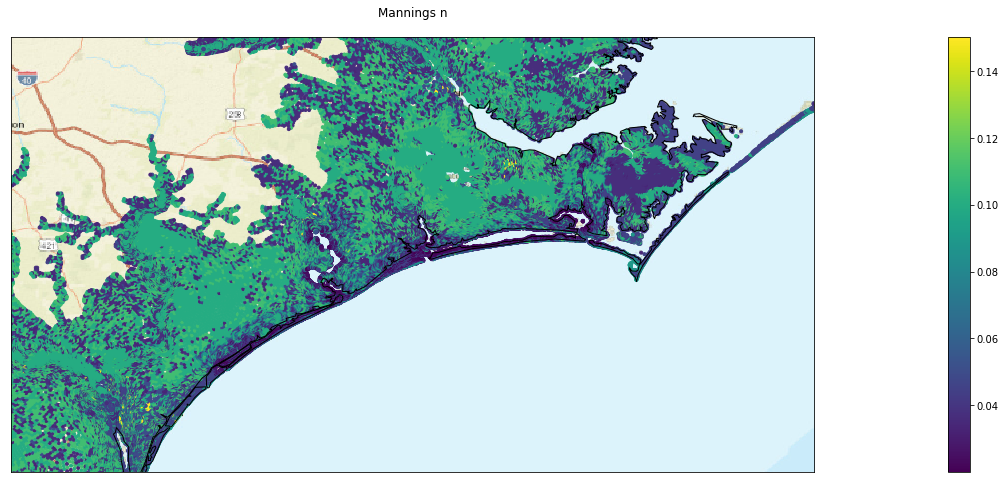

In [9]:
nc = nc4.Dataset(os.path.join(root_dir,'input_fort.nc'),'r')
grp = nc.groups['mannings_n_at_sea_floor']
lat1,lat2 = 34.059, 35.25
lon1,lon2 = -78.25, -76.05
title = 'Mannings n'
fig,ax=plt.subplots(figsize=(48,8))
adcirc.attr_plot(grp,title,ax,lat1,lat2,lon1,lon2)

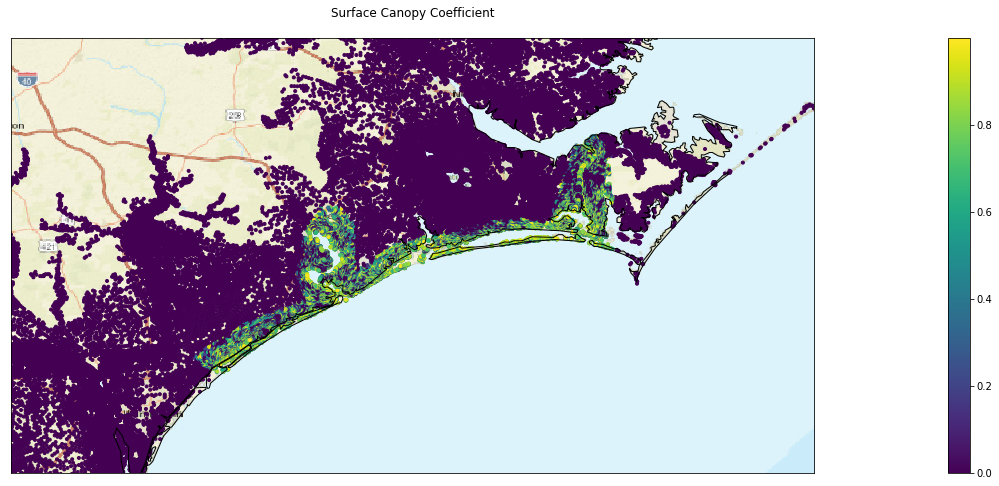

In [10]:
nc = nc4.Dataset(os.path.join(root_dir,'input_fort.nc'),'r')
grp = nc.groups['surface_canopy_coefficient']
lat1,lat2 = 34.059, 35.25
lon1,lon2 = -78.25, -76.05
title = 'Surface Canopy Coefficient'
fig,ax=plt.subplots(figsize=(48,8))
adcirc.attr_plot(grp,title,ax,lat1,lat2,lon1,lon2)

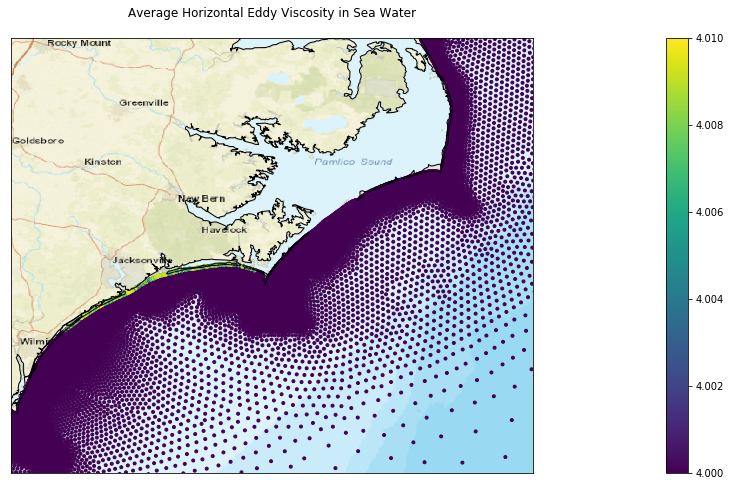

In [11]:
nc = nc4.Dataset(os.path.join(root_dir,'input_fort.nc'),'r')
grp = nc.groups['average_horizontal_eddy_viscosity_in_sea_water_wrt_depth']
lat1,lat2 = 33.5, 36
lon1,lon2 = -78, -75
data = 'Data'
title = 'Average Horizontal Eddy Viscosity in Sea Water'
fig,ax=plt.subplots(figsize=(48,8))
adcirc.attr_plot(grp,title,ax,lat1,lat2,lon1,lon2)

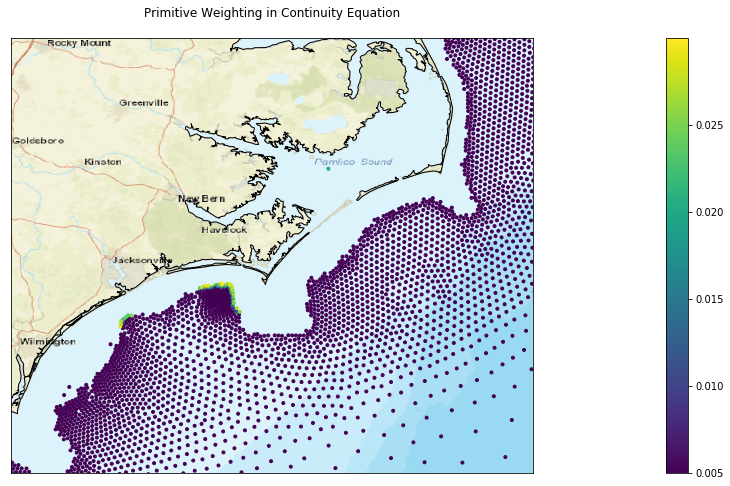

In [12]:
nc = nc4.Dataset(os.path.join(root_dir,'input_fort.nc'),'r')
grp = nc.groups['primitive_weighting_in_continuity_equation']
lat1,lat2 = 33.5, 36
lon1,lon2 = -78, -75
title = 'Primitive Weighting in Continuity Equation'
fig,ax=plt.subplots(figsize=(48,8))
adcirc.attr_plot(grp,title,ax,lat1,lat2,lon1,lon2)

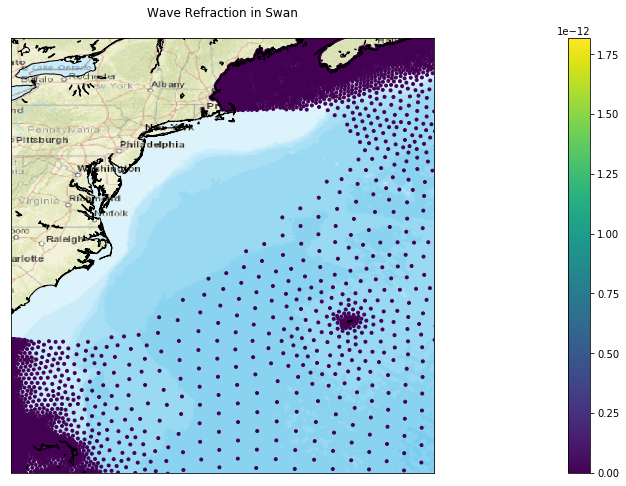

In [13]:
nc = nc4.Dataset(os.path.join(root_dir,'input_fort.nc'),'r')
grp = nc.groups['wave_refraction_in_swan']
lat1,lat2 = 25.5, 45
lon1,lon2 = -80, -61
title = 'Wave Refraction in Swan'
fig,ax=plt.subplots(figsize=(48,8))
adcirc.attr_plot(grp,title,ax,lat1,lat2,lon1,lon2)

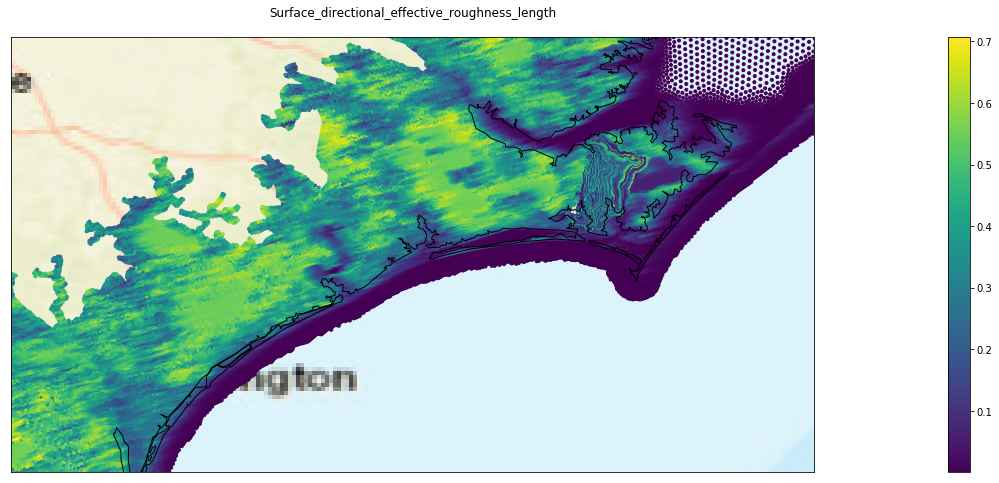

In [14]:
# Plots only one direction of the surface directional roughness
nc = nc4.Dataset(os.path.join(root_dir,'input_fort.nc'),'r')
grp = nc.groups['surface_directional_effective_roughness_length']
lat1,lat2 = 34.059, 35.25
lon1,lon2 = -78.25, -76.05
data = 'ENE' # changing this variable to the chosen direction (E,ENE,NE,N,NW,WNW,W,WSW,SW,S,SE,ESE)
pixels=200
title = 'Surface_directional_effective_roughness_length'
fig,ax=plt.subplots(figsize=(48,8))
adcirc.attr_plot(grp,title,ax,lat1,lat2,lon1,lon2,data,pixels)

### 3. Print files to model directory

In [19]:
fort15 = os.path.join(root_dir,'fort.15')
fort_templ= os.path.join(root_15,template)
with open(fort15,'w') as f_in:
    with open(fort_templ,'r') as f_out:
        lines = f_out.readlines()
        for i, line in enumerate(lines):
            for ii in range(0,len(table15)):
                if table15['variable'][ii] in line:
                    new_v = line.split(' ')[0]
                    line = line.replace(new_v,str(table15['defin'][ii]+'\t'))
            f_in.write(line)

In [20]:
# Assign date of QC & Name/Info of QC Staff
setup_date = datetime.now()
setup_staff = 'Tyler Miesse'
print('Model Set-up Completed on {} by {}'.format(setup_date, setup_staff))

Model Set-up Completed on 2018-07-31 09:20:58.219335 by Tyler Miesse


### 3. Export Completed Files

## End